<a href="https://colab.research.google.com/github/21BEC0852/Anju/blob/main/ecg_cnn_model_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install tensorflow matplotlib

In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


In [45]:
def build_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification: normal or abnormal

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = build_cnn_model()
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Saving F4.png to F4 (2).png


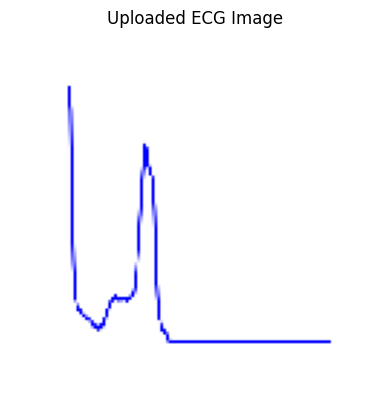

In [74]:
def upload_and_process_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        img_path = filename
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize pixel values
        return img_array

img_array = upload_and_process_image()
plt.imshow(img_array[0])
plt.title("Uploaded ECG Image")
plt.axis('off')
plt.show()


In [47]:
# Uncomment below if you have a pre-trained model
# cnn_model = tf.keras.models.load_model('your_model_path.h5')

# Otherwise, you can train the model here on your own dataset
# history = cnn_model.fit(training_data, validation_data=validation_data, epochs=10)


In [65]:
def predict_ecg_signal(model, img_array, normal_threshold=0.4, abnormal_threshold=0.6):
    """
    Predict whether an ECG signal is normal or abnormal based on dynamic thresholds.

    Parameters:
    - model: The trained CNN model
    - img_array: Preprocessed image array for prediction
    - normal_threshold: Lower limit to predict "normal" signal
    - abnormal_threshold: Upper limit to predict "abnormal" signal

    Returns:
    - A string indicating the predicted ECG status
    """
    # Make prediction and get the score
    prediction = model.predict(img_array)[0][0]
    print("Prediction Score:", prediction)  # For debugging

    # Classify based on dynamic thresholds
    if prediction >= abnormal_threshold:
        return "Abnormal ECG Signal"
    elif prediction <= normal_threshold:
        return "Normal ECG Signal"
    else:
        return "Uncertain - Further Analysis Needed"


In [75]:
# Test a single image
result = predict_ecg_signal(cnn_model, img_array)
print("Prediction:", result)

# If testing multiple images:
# for img in list_of_images:
#     result = predict_ecg_signal(cnn_model, img)
#     print(f"Prediction for image {img}: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction Score: 0.4806299
Prediction: Uncertain - Further Analysis Needed


In [70]:
cnn_model.save('ecg_cnn_model.keras')
# Load the model for future use
# cnn_model = tf.keras.models.load_model('ecg_cnn_model.keras')
